In [1]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt


Matrix = io.loadmat('C:\Users\lhren\Desktop\Fall 2017/4771\hw\hw1data.mat')
X_Y = np.concatenate((Matrix['X'],Matrix['Y']),axis=1)
np.random.shuffle(X_Y)
N = len(X_Y)
d = 784
count = np.zeros(10)
sum_element = np.zeros(10)
sum_sq_element = np.zeros(10)
for data in X_Y:
    i = int(data[d])
    count[i]+=1
    sum_element[i]+=sum(data[:d])
    for j in range(784):     
        sum_sq_element[i]+=data[j]**2
def norm_f(v):
    return sum(v*v)
def eval_f(theta):
    """ evaluates f at theta"""
    result = 0
    result+=sum(sum_sq_element) - 2*sum(sum_element*theta) + d*sum(count*theta**2)
    result = result*0.5
    return result


In [39]:
def grad_of_f(theta,X,Y):
    grad = np.zeros(10)
    
    k = int(Y)
    #scaled single point gradient
    grad[k] += N*(d*theta[k] - sum(X))
    return grad

In [107]:
theta = np.zeros(10)
index = 0
f_val=[]
x = X_Y[0][0:d]
y = X_Y[0][d]
delta_f = grad_of_f(theta,x,y)
f_true = 24297968346.4
f_val.append(eval_f(theta))
while (f_val[-1]!=f_true) and (index<9999) :
        #step size very small to get convergence
        n = 1e-9
        index+=1
        #print index
        theta = theta - n*delta_f
        f_val.append(eval_f(theta))
        if (index%10000==0):
            print index
            np.random.shuffle(X_Y)
        x = X_Y[index%10000][0:d]
        y = X_Y[index%10000,d]       
        delta_f = grad_of_f(theta,x,y)

while (f_val[-1]!=f_true) and (index<29999) :
        #step size very small to get convergence
        n = 1e-10
        index+=1
        #print index
        theta = theta - n*delta_f
        f_val.append(eval_f(theta))
        if (index%10000==0):
            print index
            np.random.shuffle(X_Y)
        x = X_Y[index%10000][0:d]
        y = X_Y[index%10000,d]       
        delta_f = grad_of_f(theta,x,y)     
while (f_val[-1]!=f_true) and (index<49999) :
        #step size very small to get convergence
        n = 1e-15
        index+=1
        #print index
        theta = theta - n*delta_f
        f_val.append(eval_f(theta))
        if (index%10000==0):
            print index
            np.random.shuffle(X_Y)
        x = X_Y[index%10000][0:d]
        y = X_Y[index%10000,d]       
        delta_f = grad_of_f(theta,x,y)     


#print results
delta_f = d*theta*count - sum_element 
print('# Iterations:' + str(index+1))
print('Minimum of f appears at x='+str(theta))
print('First derivative : '+str(delta_f))
print('f = '+str(f_val[-1]))

10000
20000
30000
40000
# Iterations:50000
Minimum of f appears at x=[ 45.36126003  19.91820399  38.34702594  36.59310178  31.3239504
  32.31317897  35.18639243  29.54389399  38.28305506  31.7945791 ]
First derivative : [  73031.39491876  -68475.97519876  -22877.21323716  100961.38929544
  -75160.24259011  -99854.79208976    7274.71932118   37677.86209844
  -43353.45952441  -21992.43265846]
f = 24297994209.6


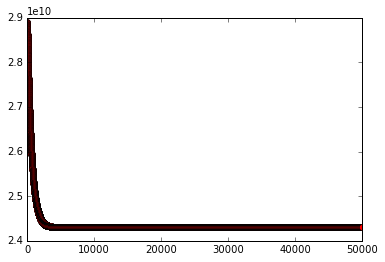

In [111]:
%matplotlib inline
plt.plot(range(index+1),f_val,'ro-')


<Container object of 10 artists>

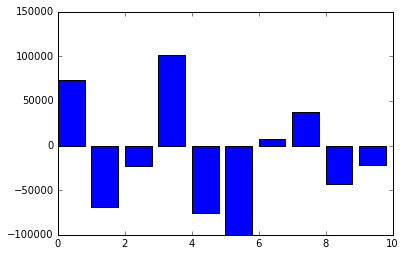

In [108]:
plt.bar(range(10),delta_f)

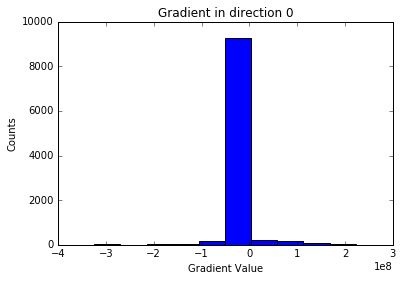

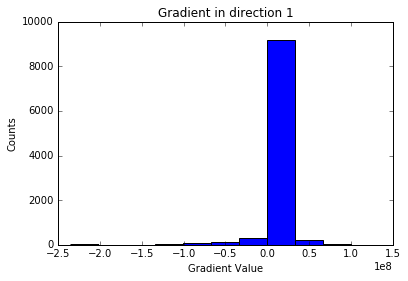

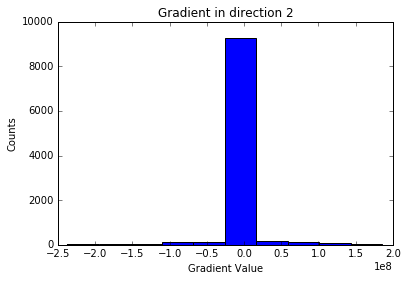

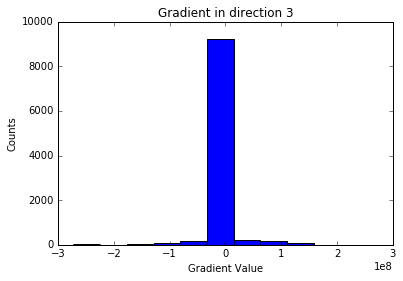

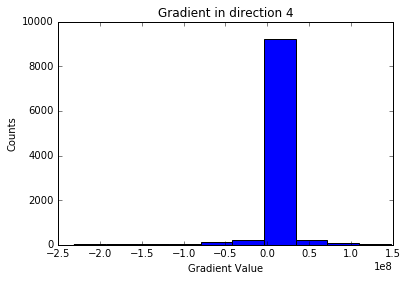

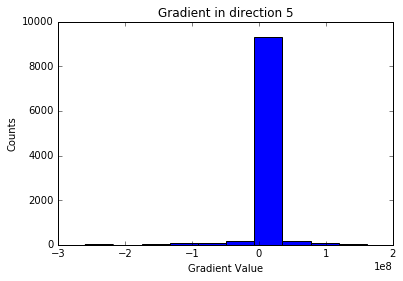

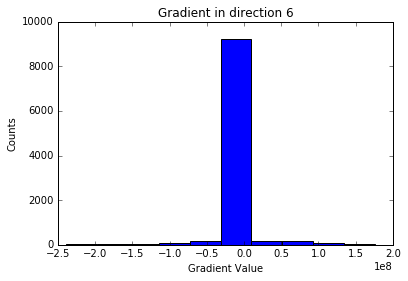

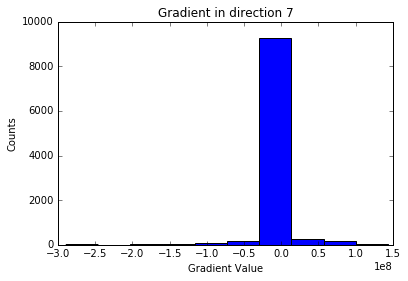

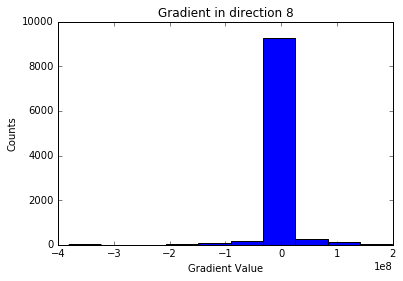

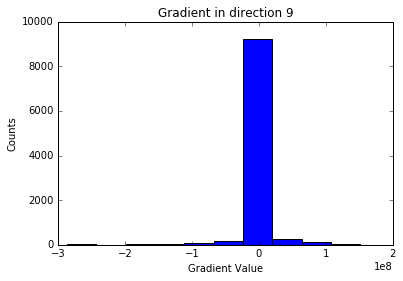

In [109]:
grad_matrix = np.zeros((10000,10))
for i in range(10000):
    data = X_Y[i]
    x = data[:d]
    y = int(data[d])
    grad_matrix[i][y] = N*(d*theta[y] - sum(x))
for j in range(10):
    grad_j = grad_matrix[:,j]
    plt.figure()
    plt.hist(grad_j)
    plt.title("Gradient in direction "+str(j))
    plt.xlabel("Gradient Value")
    plt.ylabel("Counts")
    plt.show()